In [88]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
from lab_utils_uni import plt_gradients,plt_contour_wgrad,plt_divergence
plt.style.use('./deeplearning.mplstyle')

In [89]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

In [90]:
def compute_cost(x,y,w,b):
    m=x.shape[0]
    err=0
    f_wb=np.zeros(m)
    for i in range(m):
        f_wb[i]=w*x[i]+b
        err=err+(f_wb[i]-y[i])**2     
    tot_cost=(1/(2*m))*err
    return tot_cost

In [91]:
def compute_gradient(x,y,w,b):
    m=x.shape[0]
    f_wb=np.zeros(m)
    dj_dw=0
    dj_db=0
    for i in range(m):
        f_wb[i]=w*x[i]+b
        dj_dw_i=(f_wb[i]-y[i])*x[i]
        dj_dw+=dj_dw_i
        dj_db_i=f_wb[i]-y[i]
        dj_db+=dj_db_i
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    return dj_dw,dj_db


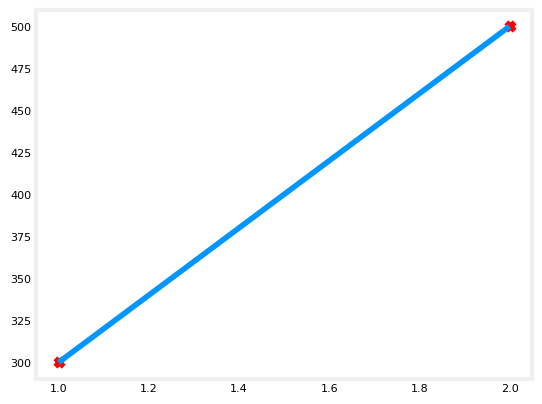

In [92]:
plt.plot(x_train,y_train)
plt.scatter(x_train,y_train,marker='x',c="red")
plt.show()

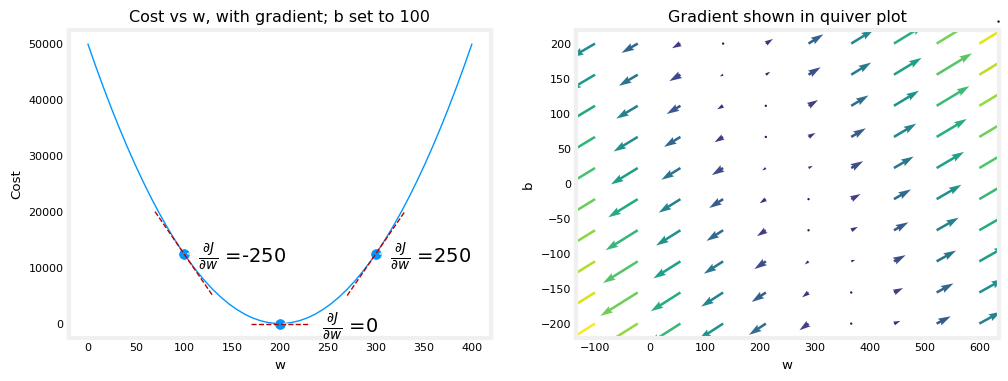

In [93]:
plt_gradients(x_train,y_train,compute_cost,compute_gradient)

In [94]:
def gradient_desent(x,y,w_in,b_in,alpha,numb_itters,cost_function,gradient_function): 
    w=copy.deepcopy(w_in)
    b=b_in
    j_hist=[] # cost history
    p_hist=[] #parameter history
    for j in range(numb_itters):
        dj_dw,dj_db=gradient_function(x,y,w,b)
        w=w-(alpha*dj_dw)
        b=b-(alpha*dj_db)

        #optional just listing the informations
        if j<100000:
            j_hist.append(cost_function(x,y,w,b))
            p_hist.append([w,b])
        if j% math.ceil(numb_itters/10)== 0:
            print(f"itteration: {numb_itters}, cost: {j_hist[-1]:0.2e}, dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e} ,w: {w: 0.3e}, b:{b: 0.5e}")

    return w,b,j_hist,p_hist


In [95]:
wint=0
bint=0
itter=10000
alp=1.0e-2


w_f,b_f,j_hist,p_hist=gradient_desent(x_train,y_train,wint,bint,alp,itter,compute_cost,compute_gradient)
print(f"this is w {w_f} and this is b {b_f}")

itteration: 10000, cost: 7.93e+04, dj_dw: -6.500e+02, dj_db: -4.000e+02 ,w:  6.500e+00, b: 4.00000e+00
itteration: 10000, cost: 3.41e+00, dj_dw: -3.712e-01, dj_db:  6.007e-01 ,w:  1.949e+02, b: 1.08228e+02
itteration: 10000, cost: 7.93e-01, dj_dw: -1.789e-01, dj_db:  2.895e-01 ,w:  1.975e+02, b: 1.03966e+02
itteration: 10000, cost: 1.84e-01, dj_dw: -8.625e-02, dj_db:  1.396e-01 ,w:  1.988e+02, b: 1.01912e+02
itteration: 10000, cost: 4.28e-02, dj_dw: -4.158e-02, dj_db:  6.727e-02 ,w:  1.994e+02, b: 1.00922e+02
itteration: 10000, cost: 9.95e-03, dj_dw: -2.004e-02, dj_db:  3.243e-02 ,w:  1.997e+02, b: 1.00444e+02
itteration: 10000, cost: 2.31e-03, dj_dw: -9.660e-03, dj_db:  1.563e-02 ,w:  1.999e+02, b: 1.00214e+02
itteration: 10000, cost: 5.37e-04, dj_dw: -4.657e-03, dj_db:  7.535e-03 ,w:  1.999e+02, b: 1.00103e+02
itteration: 10000, cost: 1.25e-04, dj_dw: -2.245e-03, dj_db:  3.632e-03 ,w:  2.000e+02, b: 1.00050e+02
itteration: 10000, cost: 2.90e-05, dj_dw: -1.082e-03, dj_db:  1.751e-03 ,

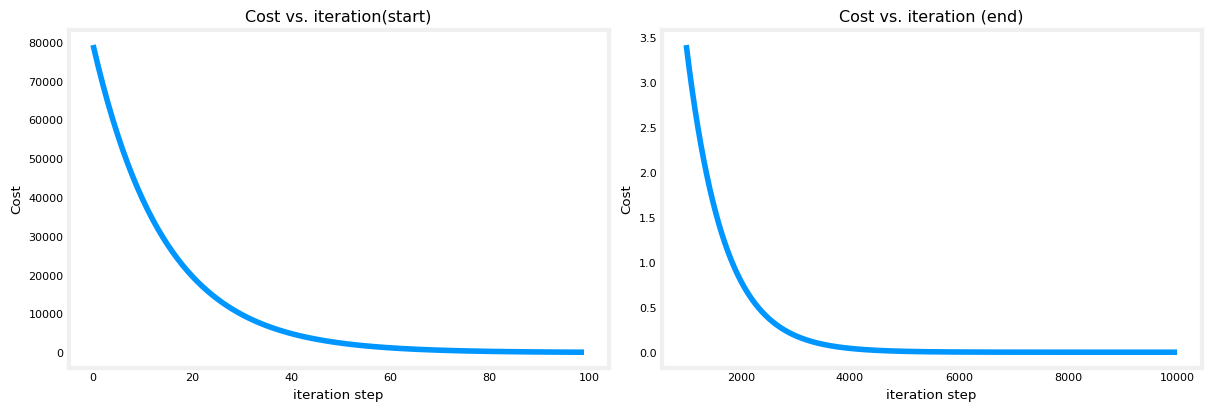

In [96]:
# draw a const vs itteration graph
# to find out if it is learning graph

fig,(ax1,ax2)=plt.subplots(1,2, constrained_layout=True, figsize=(12,4))
ax1.plot(j_hist[:100])
ax2.plot(1000+np.arange(len(j_hist[1000:])),j_hist[1000:]) #x and y values
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()


In [97]:
print(f"1000 sqft house prediction {w_f*1.0 + b_f:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_f*1.2 + b_f:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_f*2.0 + b_f:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


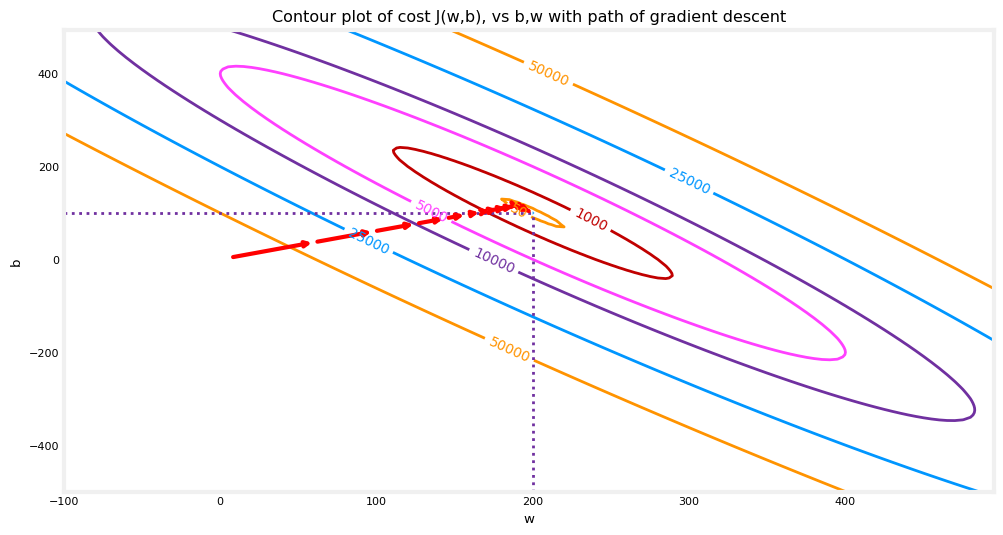

In [98]:
# plot the gra[h for it 

fig,ax=plt.subplots(1,1 , figsize=(12,6))
plt_contour_wgrad(x_train,y_train,p_hist,ax)

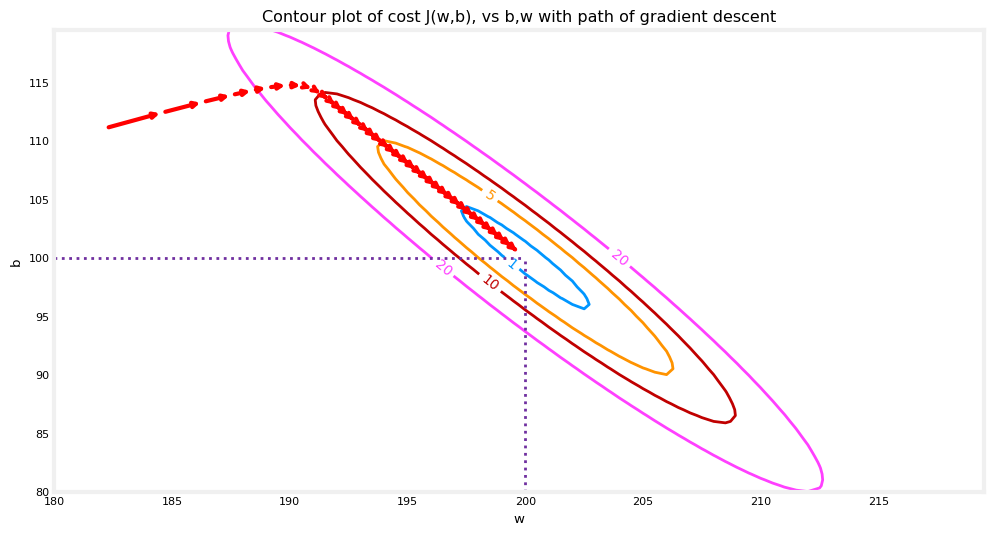

In [99]:
#can see the last steps clearly
fig,ax=plt.subplots(1,1,figsize=(12,6))
plt_contour_wgrad(x_train, y_train, p_hist, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
            contours=[1,5,10,20],resolution=0.5)

In [100]:
# what if the learning rate is too large
wint=0
bint=0
itter=10
alp=8.0e-1


w_f,b_f,j_hist,p_hist=gradient_desent(x_train,y_train,wint,bint,alp,itter,compute_cost,compute_gradient)
print(f"this is w {w_f} and this is b {b_f}")

itteration: 10, cost: 2.58e+05, dj_dw: -6.500e+02, dj_db: -4.000e+02 ,w:  5.200e+02, b: 3.20000e+02
itteration: 10, cost: 7.82e+05, dj_dw:  1.130e+03, dj_db:  7.000e+02 ,w: -3.840e+02, b:-2.40000e+02
itteration: 10, cost: 2.37e+06, dj_dw: -1.970e+03, dj_db: -1.216e+03 ,w:  1.192e+03, b: 7.32800e+02
itteration: 10, cost: 7.19e+06, dj_dw:  3.429e+03, dj_db:  2.121e+03 ,w: -1.551e+03, b:-9.63840e+02
itteration: 10, cost: 2.18e+07, dj_dw: -5.974e+03, dj_db: -3.691e+03 ,w:  3.228e+03, b: 1.98886e+03
itteration: 10, cost: 6.62e+07, dj_dw:  1.040e+04, dj_db:  6.431e+03 ,w: -5.095e+03, b:-3.15579e+03
itteration: 10, cost: 2.01e+08, dj_dw: -1.812e+04, dj_db: -1.120e+04 ,w:  9.402e+03, b: 5.80237e+03
itteration: 10, cost: 6.09e+08, dj_dw:  3.156e+04, dj_db:  1.950e+04 ,w: -1.584e+04, b:-9.80139e+03
itteration: 10, cost: 1.85e+09, dj_dw: -5.496e+04, dj_db: -3.397e+04 ,w:  2.813e+04, b: 1.73730e+04
itteration: 10, cost: 5.60e+09, dj_dw:  9.572e+04, dj_db:  5.916e+04 ,w: -4.845e+04, b:-2.99567e+04


### failed to converge

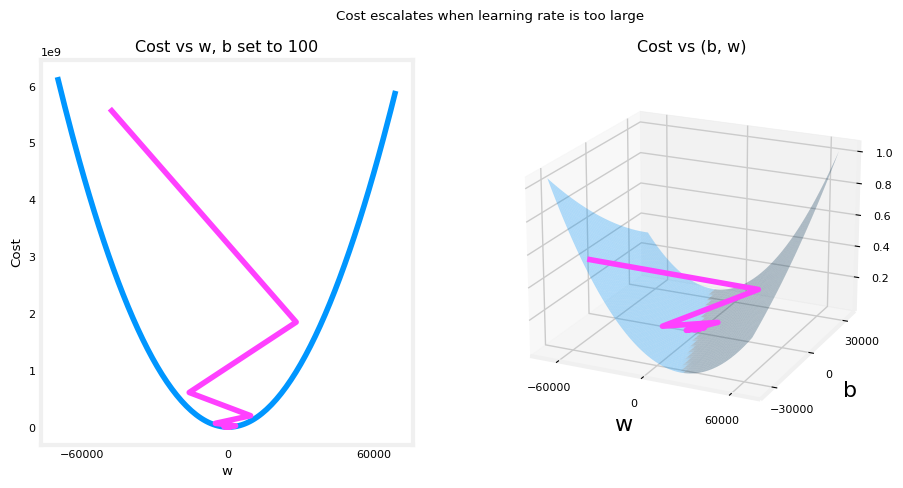

In [101]:
plt_divergence(p_hist, j_hist,x_train, y_train)
plt.show()

### it is not learning graph

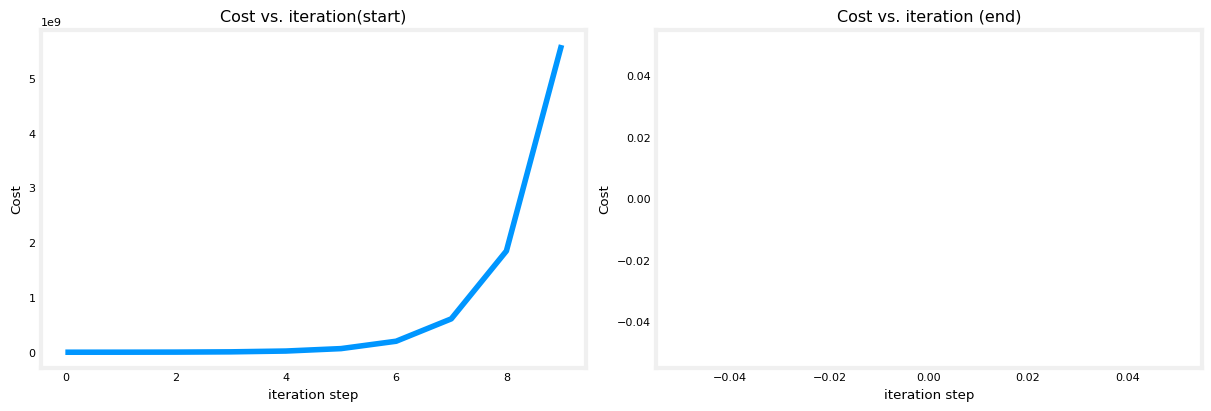

In [102]:
# draw a const vs itteration graph
# to find out if it is learning graph

fig,(ax1,ax2)=plt.subplots(1,2, constrained_layout=True, figsize=(12,4))
ax1.plot(j_hist[:100])
ax2.plot(1000+np.arange(len(j_hist[1000:])),j_hist[1000:]) #x and y values
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()
